In [ ]:
import pandas as pd
import os
os.chdir('')
fp = "ln_hpc.txt"
df = pd.read_csv(fp, sep = ";")

In [1]:
pwd


'C:\\Users\\ADMIN'

In [2]:
import pandas as pd
import os
os.chdir("F:\\datasets")
fp = "household_power_consumption.txt"
df = pd.read_csv(fp, sep = ";")

C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.isnull().sum()


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
df[df["Voltage"] == "?"].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


In [5]:
df["Timestamp"] = df["Date"] + " " + df["Time"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"],format="%d/%m/%Y %H:%M:%S")
df = df.set_index("Timestamp")

In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df_prb = df[df.isnull().any(axis = 1)]

In [8]:
import numpy as np
prob_dates = np.unique(df_prb.index.date)

In [9]:
df_prb.shape

(25979, 9)

In [10]:
prob_dates[:10]

array([datetime.date(2006, 12, 21), datetime.date(2006, 12, 30),
       datetime.date(2007, 1, 14), datetime.date(2007, 1, 28),
       datetime.date(2007, 2, 22), datetime.date(2007, 3, 25),
       datetime.date(2007, 4, 28), datetime.date(2007, 4, 29),
       datetime.date(2007, 4, 30), datetime.date(2007, 6, 1)],
      dtype=object)

In [11]:
req_cols = ["Date", "Time", "Voltage"]
df = df[req_cols]
df = df[- (df["Voltage"] == "?")]
df.isnull().sum()

Date       0
Time       0
Voltage    0
dtype: int64

In [12]:
df["Voltage"] = df["Voltage"].astype('float')

In [13]:
df.columns

Index(['Date', 'Time', 'Voltage'], dtype='object')

In [14]:
df = df[["Voltage"]]

In [15]:
df.isnull().sum()

Voltage    0
dtype: int64

In [16]:
df.columns

Index(['Voltage'], dtype='object')

In [17]:
hourly_voltage = df.groupby(pd.Grouper(freq='H')).mean()

In [18]:
hourly_voltage.isnull().sum()

Voltage    421
dtype: int64

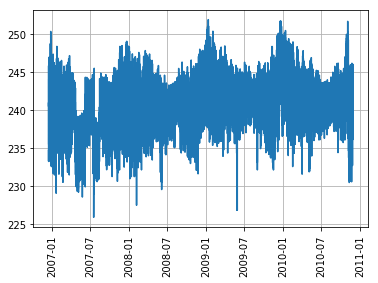

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline  
fig, ax = plt.subplots()
ax.plot(hourly_voltage.index, hourly_voltage)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation='vertical')
plt.grid()


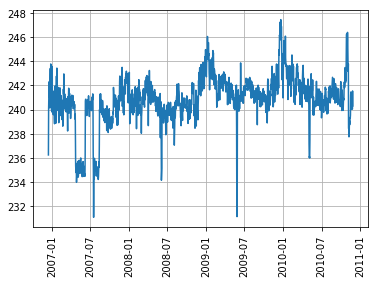

In [20]:
daily_voltage = df.groupby(pd.Grouper(freq='D')).mean()
daily_voltage = daily_voltage.dropna()
daily_voltage.index
fig, ax = plt.subplots()
ax.plot(daily_voltage.index, daily_voltage)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation='vertical')
plt.grid()


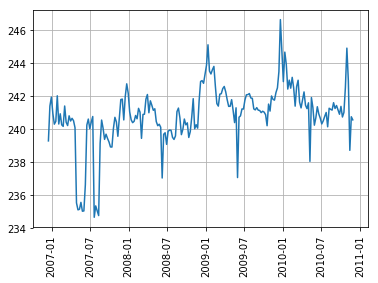

In [21]:
weekly_voltage = df.groupby(pd.Grouper(freq='W')).mean()
weekly_voltage = weekly_voltage.dropna()
fig, ax = plt.subplots()
ax.plot(weekly_voltage.index, weekly_voltage)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation='vertical')
plt.grid()

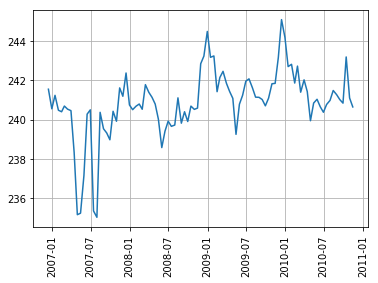

In [22]:
semimonthly_voltage = df.groupby(pd.Grouper(freq='SM')).mean()
semimonthly_voltage = semimonthly_voltage.dropna()
fig, ax = plt.subplots()
ax.plot(semimonthly_voltage.index, semimonthly_voltage)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation='vertical')
plt.grid()

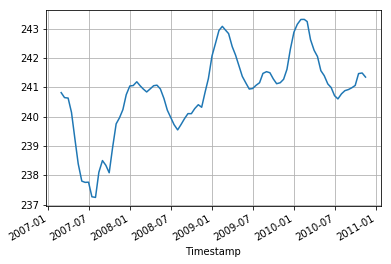

In [23]:
semimonthly_voltage["Voltage"].rolling(6).mean().plot()
plt.grid()

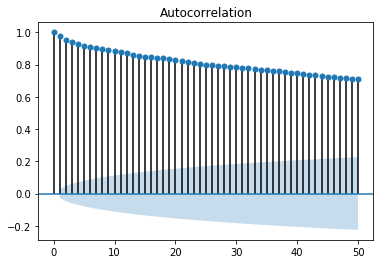

In [24]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df['Voltage'][:5000], lags=50)
plt.show()

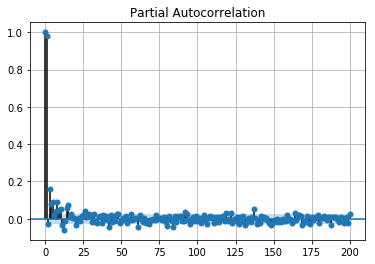

In [25]:
fig = tsaplots.plot_pacf(df['Voltage'][:5000], lags=200)
plt.grid()

In [1]:
df[21-12-2007]


NameError: name 'df' is not defined

In [2]:
df['date']

NameError: name 'df' is not defined